## PROJECT: Diwali Sales Analysis & Customer Segmentation
BUSINESS PROBLEM: 
- Understand customer purchasing patterns during Diwali season
- Identify key customer segments for targeted marketing
- Predict sales to optimize inventory and pricing

DATASET OVERVIEW:
- 11,239 customer records
- 13 features including demographics, orders, and purchase amounts
- Time period: Diwali sales season

BUSINESS OBJECTIVES:
1. Analyze sales trends across different customer segments
2. Build ML models for customer segmentation
3. Predict sales amounts for business planning
4. Provide actionable recommendations for next Diwali season
"""

In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\python_diwali_sales_analysis\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding='unicode_escape')


In [3]:
df.shape

(11251, 15)

In [4]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
df.shape


(11239, 13)

In [10]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int64')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [14]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

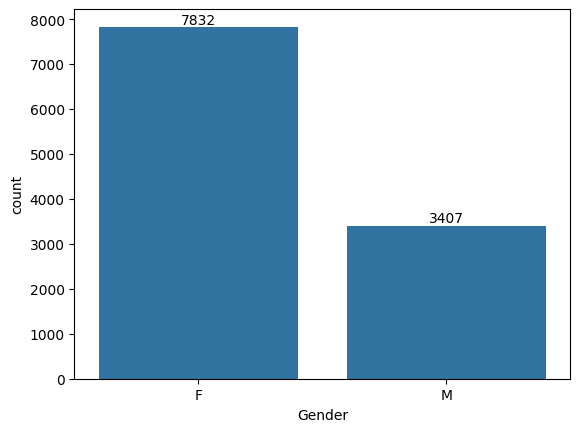

In [16]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

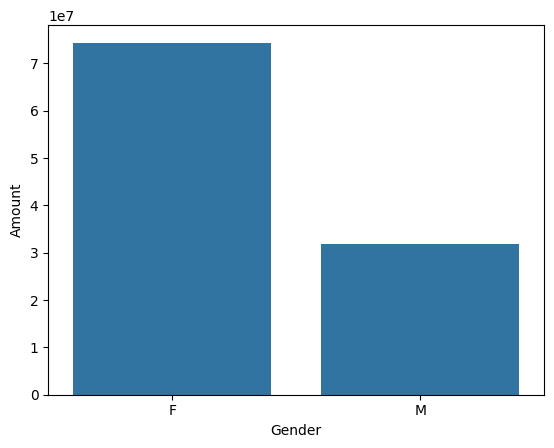

In [17]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

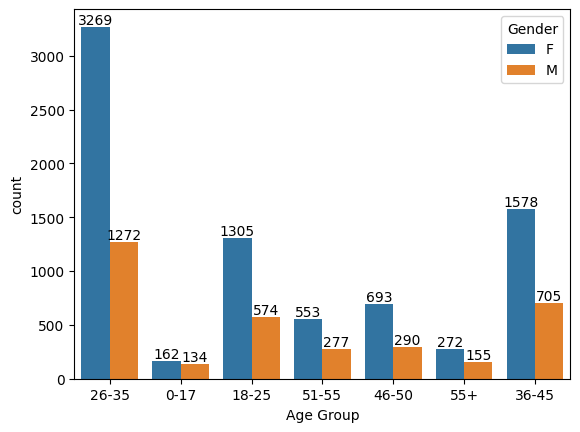

In [18]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

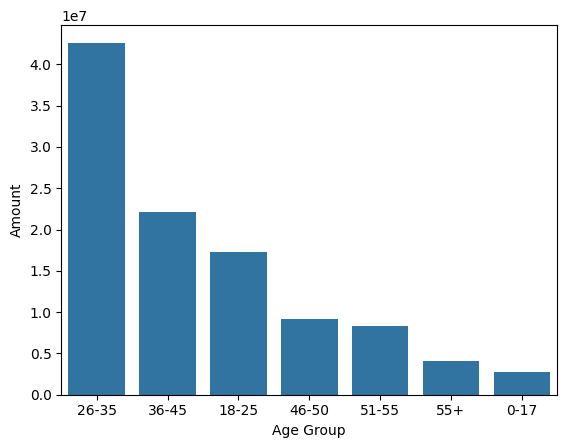

In [19]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

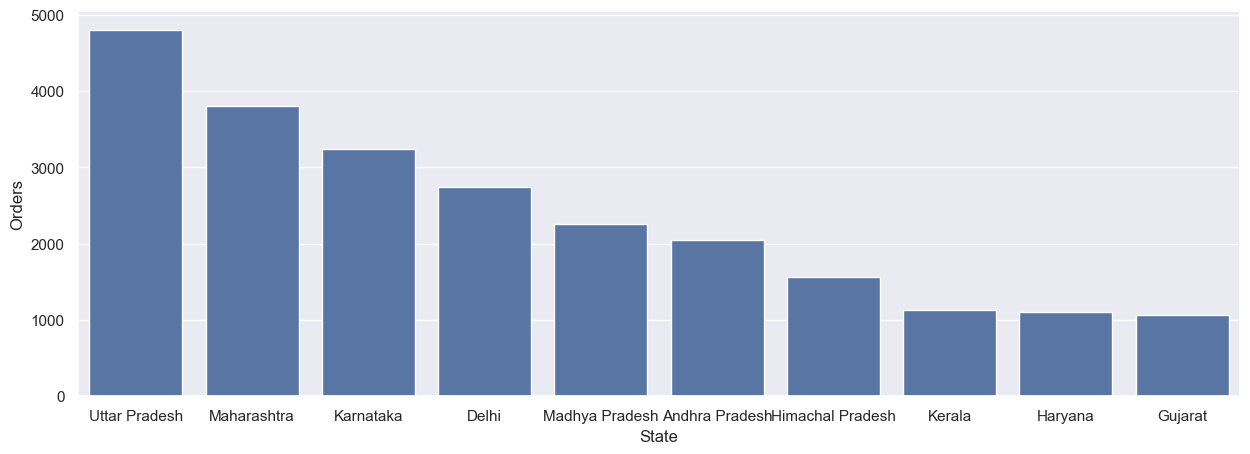

In [20]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.show()

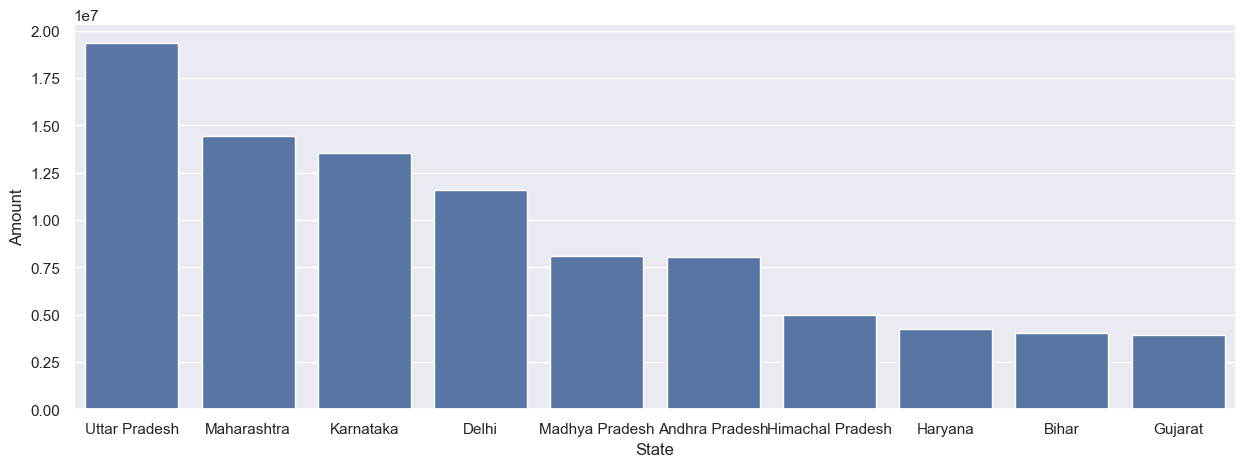

In [21]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

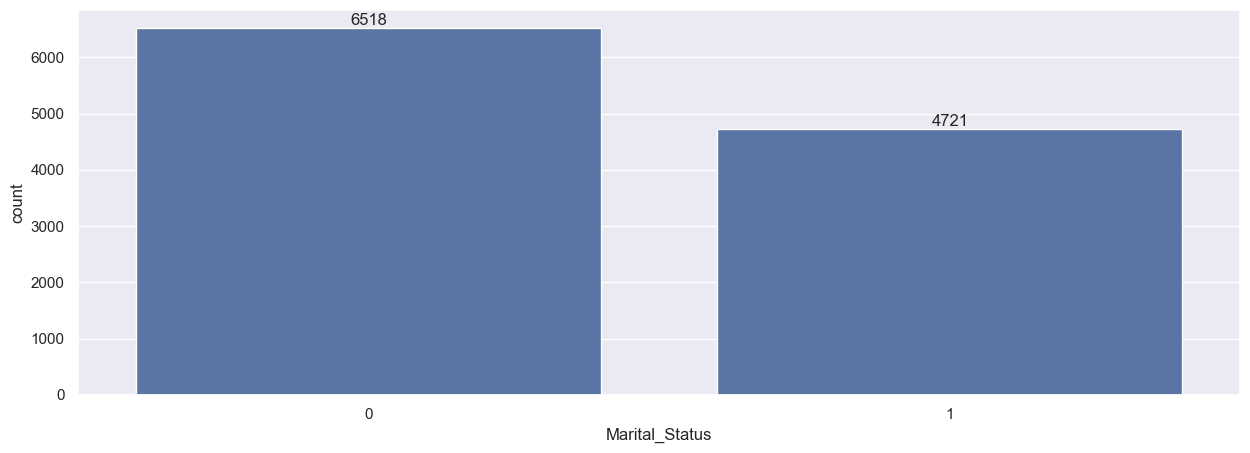

In [22]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

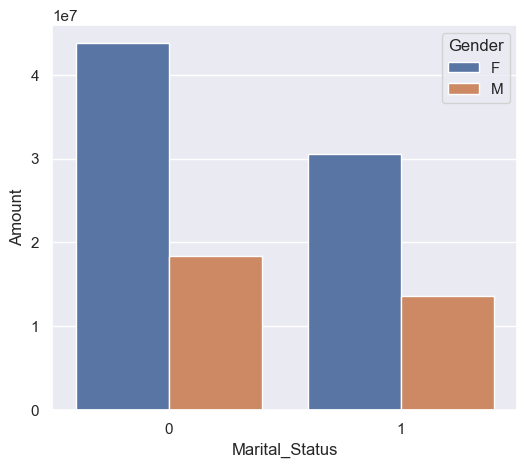

In [23]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

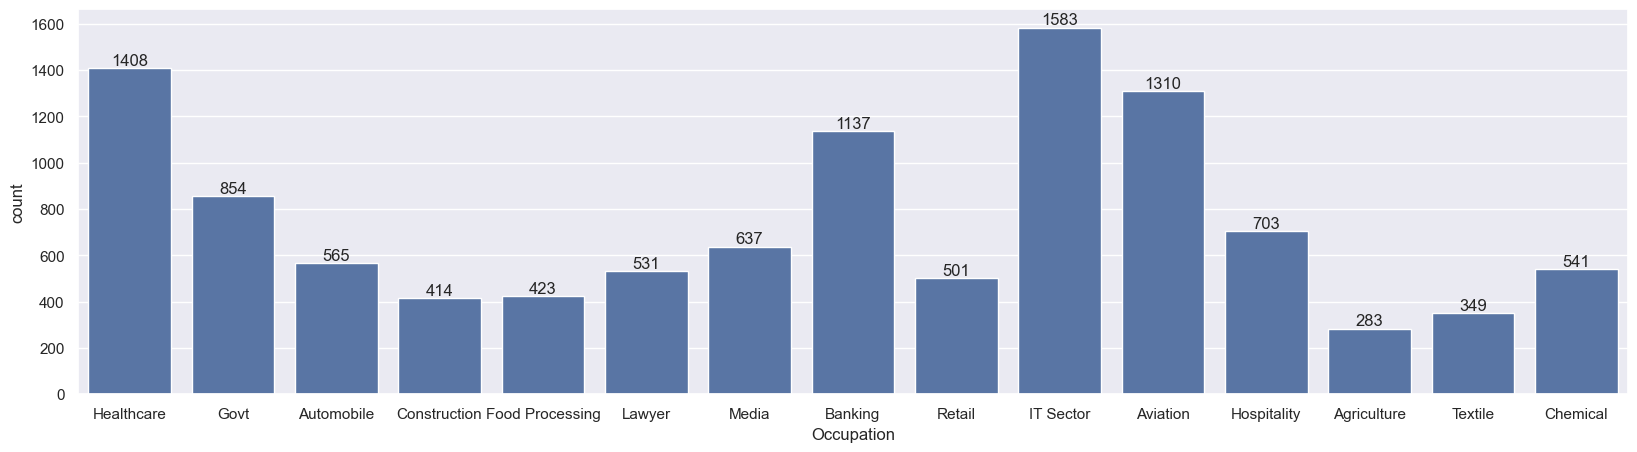

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

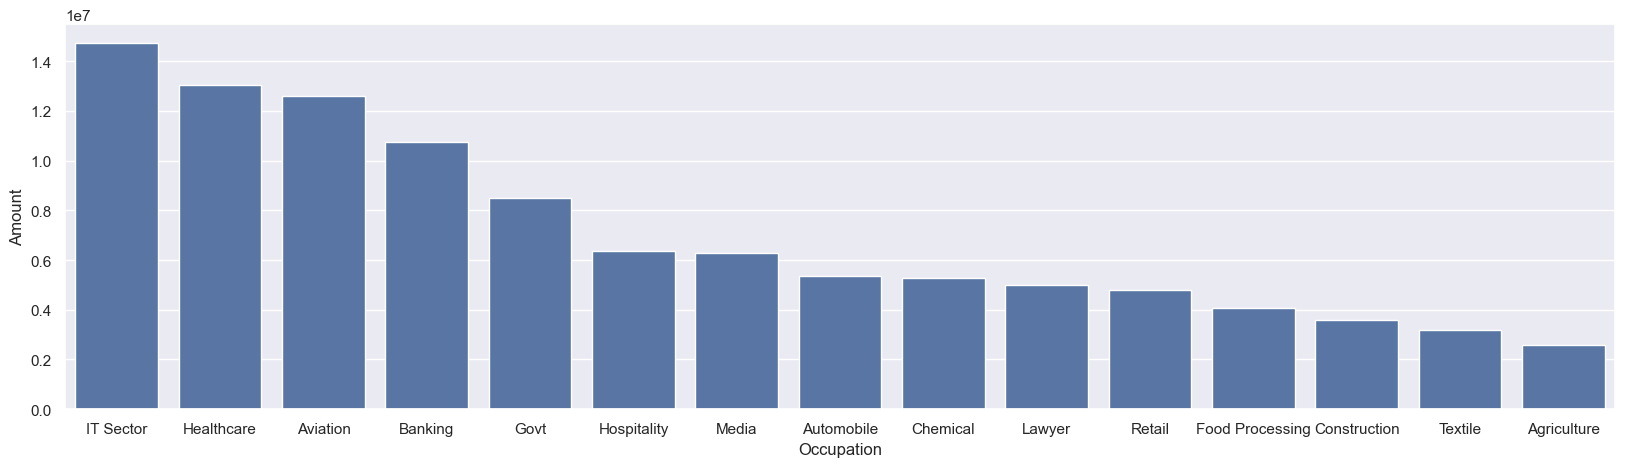

In [25]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

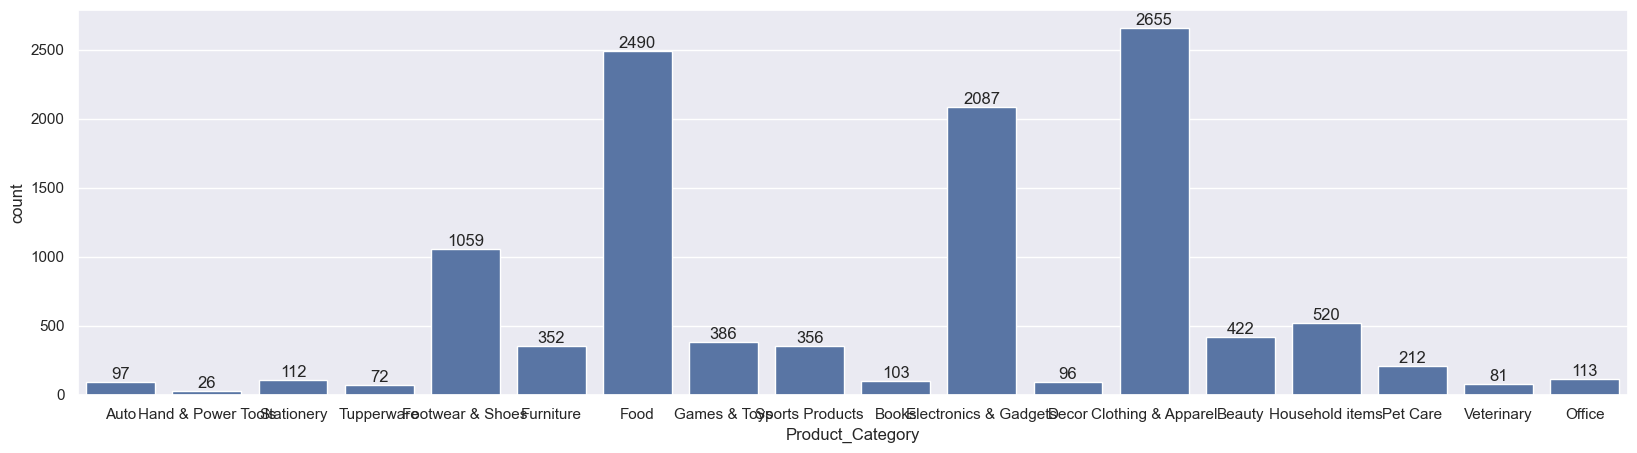

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

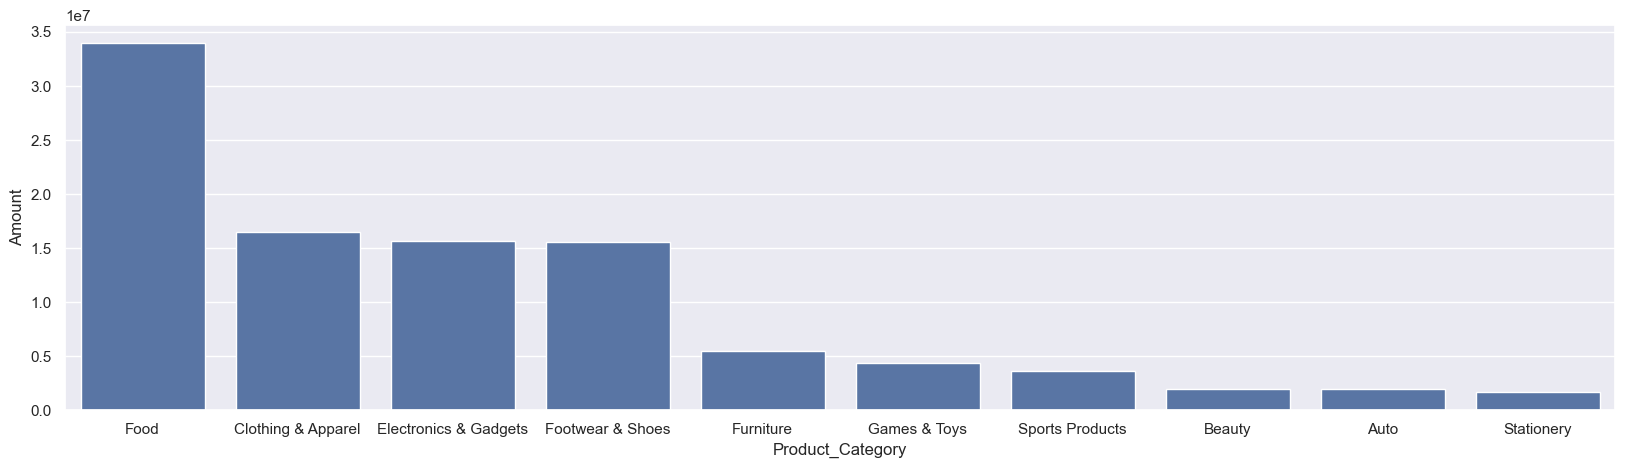

In [27]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

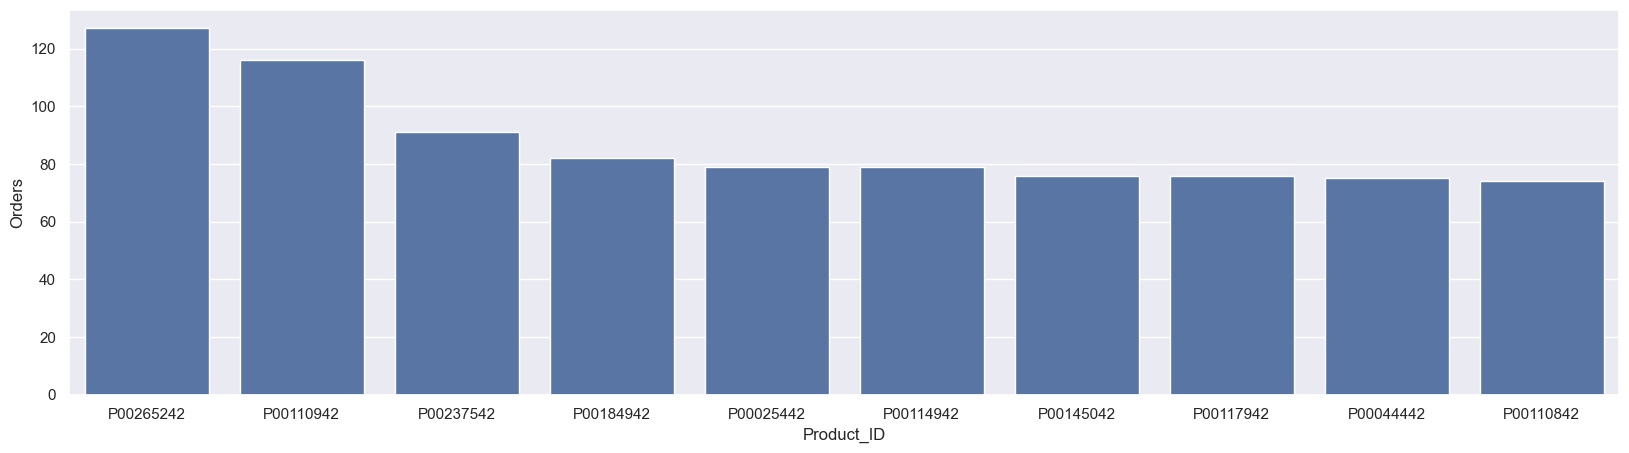

In [28]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.show()

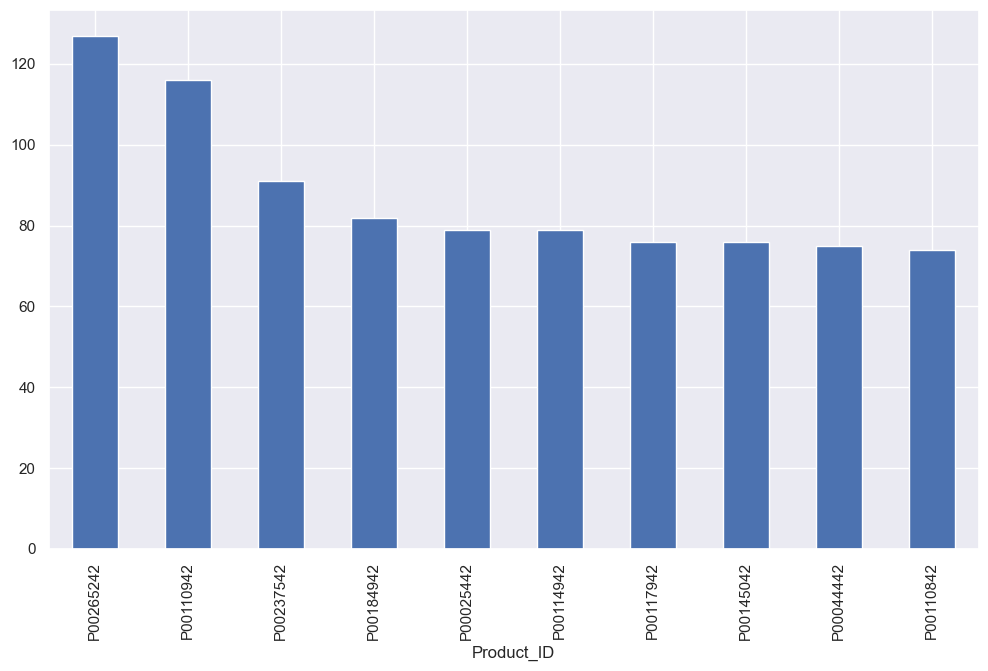

In [29]:
# top 10 most sold products 

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

## ML Customer segmentation

In [30]:
# MACHINE LEARNING IMPORTS

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("Machine Learning libraries imported successfully!")

Machine Learning libraries imported successfully!


In [31]:
# DATA PREPARATION FOR MACHINE LEARNING
print("Preparing data for Machine Learning...")

# Create a copy for ML to avoid modifying original data
df_ml = df.copy()

# Display current data info
print(f"Dataset shape: {df_ml.shape}")
print(f"Columns: {list(df_ml.columns)}")
print("\nFirst 3 rows of data:")
display(df_ml.head(3))

Preparing data for Machine Learning...
Dataset shape: (11239, 13)
Columns: ['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount']

First 3 rows of data:


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924


In [32]:
# ENCODE CATEGORICAL VARIABLES
print(" Encoding categorical variables for ML...")

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Product_Category']

for col in categorical_cols:
    le = LabelEncoder()
    df_ml[col + '_encoded'] = le.fit_transform(df_ml[col].astype(str))
    label_encoders[col] = le
    print(f" Encoded {col} -> {df_ml[col + '_encoded'].nunique()} unique values")

print(f"\nNew dataset shape: {df_ml.shape}")
print("Encoded columns:", [col for col in df_ml.columns if 'encoded' in col])

 Encoding categorical variables for ML...
 Encoded Gender -> 2 unique values
 Encoded Age Group -> 7 unique values
 Encoded State -> 16 unique values
 Encoded Zone -> 5 unique values
 Encoded Occupation -> 15 unique values
 Encoded Product_Category -> 18 unique values

New dataset shape: (11239, 19)
Encoded columns: ['Gender_encoded', 'Age Group_encoded', 'State_encoded', 'Zone_encoded', 'Occupation_encoded', 'Product_Category_encoded']



 CUSTOMER SEGMENTATION ANALYSIS
Finding optimal number of clusters...


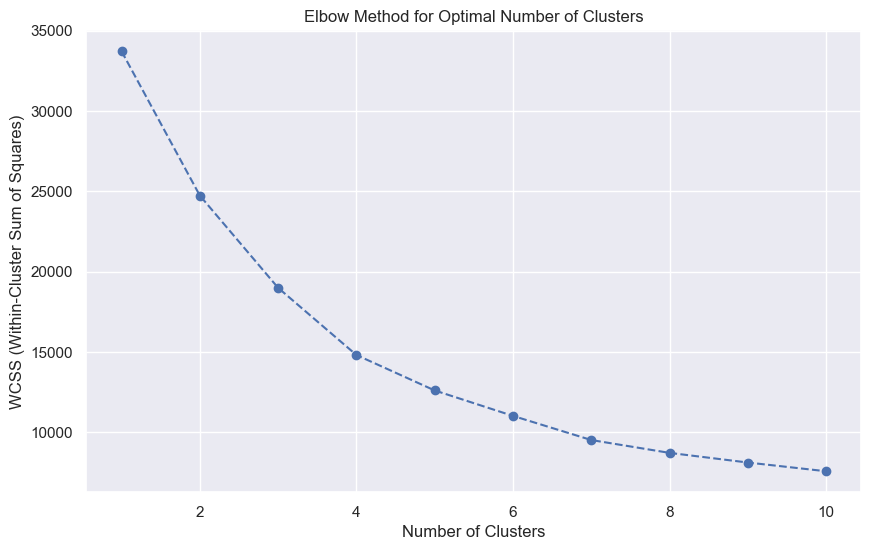

 Selected 4 clusters based on elbow method
 Customer segmentation completed!
Segment distribution:
Customer_Segment
0    3467
1    2606
2    1882
3    3284
Name: count, dtype: int64


In [33]:
# CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING
print("\n CUSTOMER SEGMENTATION ANALYSIS")
print("="*50)

# Features for customer segmentation
features_cluster = ['Age', 'Orders', 'Amount']
X_cluster = df_ml[features_cluster]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Find optimal number of clusters using Elbow Method
print("Finding optimal number of clusters...")
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Based on elbow curve, choose 4 clusters
optimal_clusters = 4
print(f" Selected {optimal_clusters} clusters based on elbow method")

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df_ml['Customer_Segment'] = kmeans.fit_predict(X_scaled)

print(" Customer segmentation completed!")
print(f"Segment distribution:\n{df_ml['Customer_Segment'].value_counts().sort_index()}")

In [34]:
# ANALYZE CUSTOMER SEGMENTS
print("\n ANALYZING CUSTOMER SEGMENTS")
print("="*40)

# Segment analysis
segment_analysis = df_ml.groupby('Customer_Segment').agg({
    'Age': 'mean',
    'Orders': 'mean', 
    'Amount': 'mean',
    'Gender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'Age Group': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(2)

segment_analysis['Count'] = df_ml['Customer_Segment'].value_counts().sort_index()

print(" Customer Segment Profiles:")
display(segment_analysis)

# Name the segments based on characteristics
segment_names = {
    0: "Young Budget Shoppers",
    1: "High-Value Frequent Buyers", 
    2: "Middle-Age Moderate Spenders",
    3: "Occasional Older Shoppers"
}

df_ml['Segment_Name'] = df_ml['Customer_Segment'].map(segment_names)


 ANALYZING CUSTOMER SEGMENTS
 Customer Segment Profiles:


,Age,Orders,Amount,Gender,Age Group,Count
Customer_Segment,,,,,,
0,30.79,1.45,6853.73,F,26-35,3467
1,33.76,2.45,17021.45,F,26-35,2606
2,55.43,2.62,8305.90,F,51-55,1882
3,30.13,3.54,6850.69,F,26-35,3284



📊 VISUALIZING CUSTOMER SEGMENTS


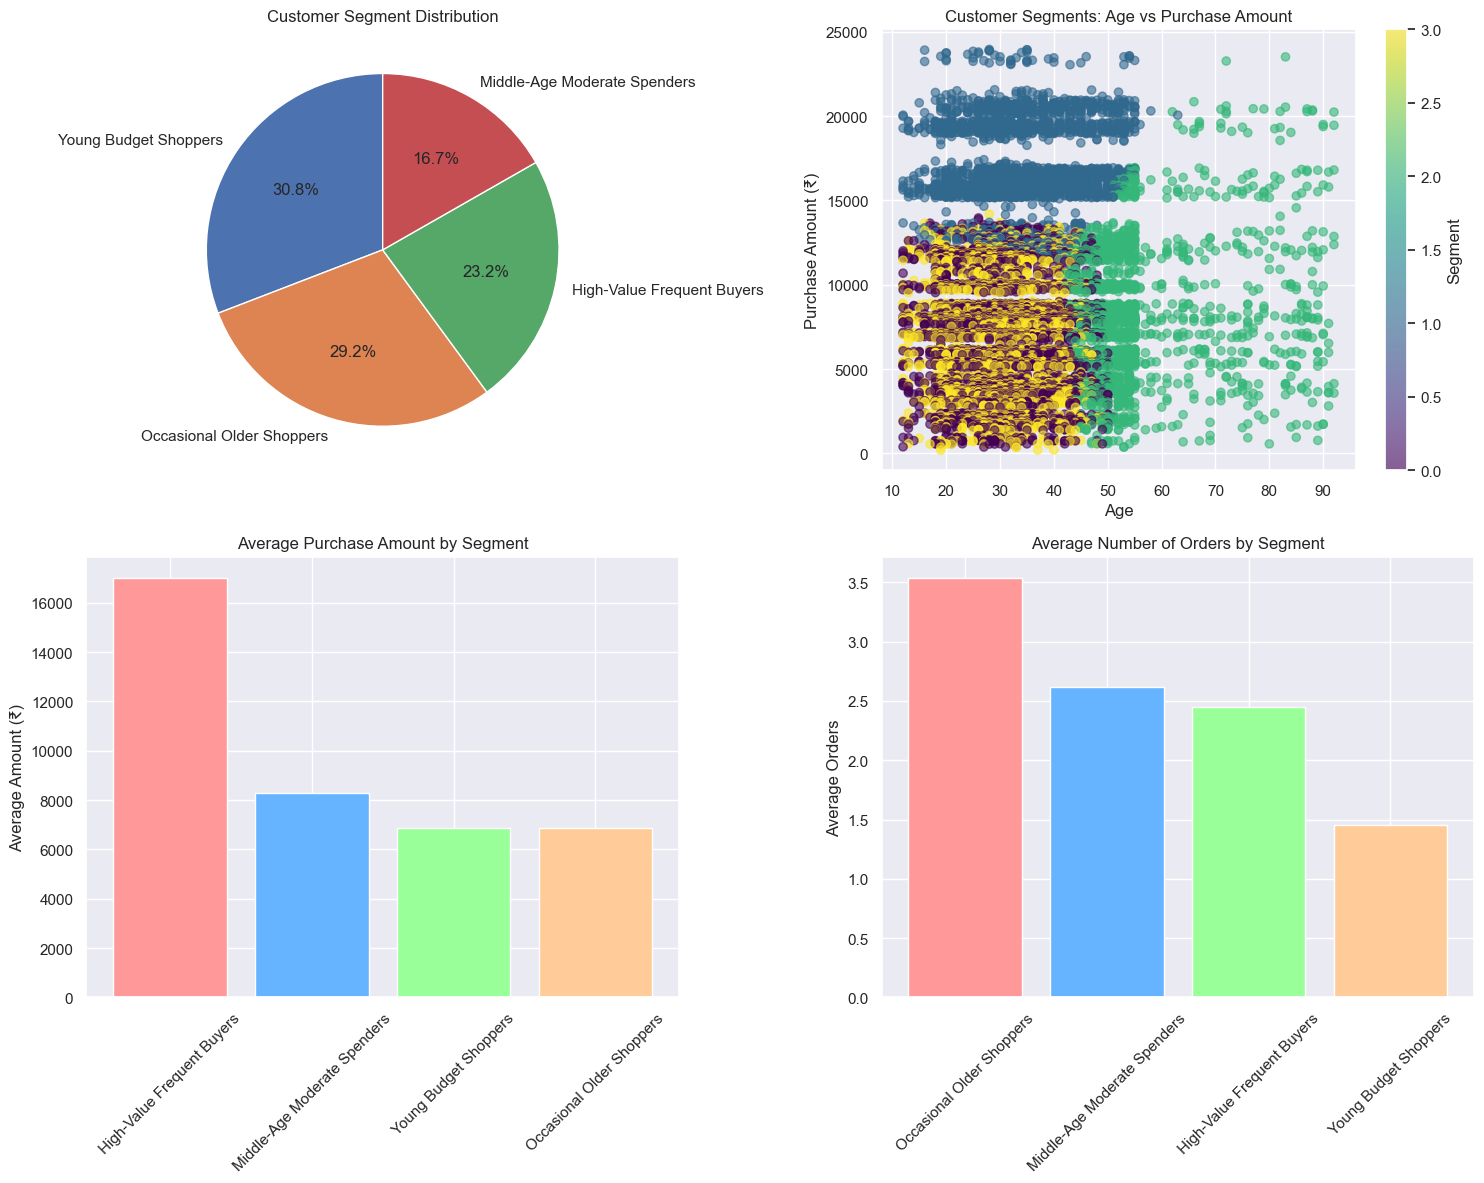

In [35]:
# VISUALIZE CUSTOMER SEGMENTS
print("\n📊 VISUALIZING CUSTOMER SEGMENTS")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Segment distribution
segment_counts = df_ml['Segment_Name'].value_counts()
axes[0,0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Customer Segment Distribution')

# Plot 2: Age vs Amount by segment
scatter = axes[0,1].scatter(df_ml['Age'], df_ml['Amount'], c=df_ml['Customer_Segment'], cmap='viridis', alpha=0.6)
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Purchase Amount (₹)')
axes[0,1].set_title('Customer Segments: Age vs Purchase Amount')
plt.colorbar(scatter, ax=axes[0,1], label='Segment')

# Plot 3: Average amount by segment
segment_avg = df_ml.groupby('Segment_Name')['Amount'].mean().sort_values(ascending=False)
axes[1,0].bar(segment_avg.index, segment_avg.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1,0].set_title('Average Purchase Amount by Segment')
axes[1,0].set_ylabel('Average Amount (₹)')
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Orders by segment
segment_orders = df_ml.groupby('Segment_Name')['Orders'].mean().sort_values(ascending=False)
axes[1,1].bar(segment_orders.index, segment_orders.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1,1].set_title('Average Number of Orders by Segment')
axes[1,1].set_ylabel('Average Orders')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [36]:
# SALES PREDICTION MODEL - RANDOM FOREST
print("\n SALES PREDICTION MODEL")
print("="*40)

# Prepare features for prediction
feature_columns = [col for col in df_ml.columns if 'encoded' in col] + ['Age', 'Orders']
X = df_ml[feature_columns]
y = df_ml['Amount']

print(f"Features used: {feature_columns}")
print(f"Target variable: Purchase Amount")
print(f"Training data shape: {X.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Train Random Forest model
print("\n Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model training completed!")
print(f"\n MODEL PERFORMANCE:")
print(f"   Mean Absolute Error: ₹{mae:.2f}")
print(f"   R² Score: {r2:.4f}")
print(f"   Accuracy: Model explains {r2*100:.2f}% of variance in sales data")


 SALES PREDICTION MODEL
Features used: ['Gender_encoded', 'Age Group_encoded', 'State_encoded', 'Zone_encoded', 'Occupation_encoded', 'Product_Category_encoded', 'Age', 'Orders']
Target variable: Purchase Amount
Training data shape: (11239, 8)
Training set: 8991 samples
Testing set: 2248 samples

 Training Random Forest Regressor...
 Model training completed!

 MODEL PERFORMANCE:
   Mean Absolute Error: ₹2429.66
   R² Score: 0.6143
   Accuracy: Model explains 61.43% of variance in sales data



 FEATURE IMPORTANCE ANALYSIS
 Feature Importance Ranking:


,Feature,Importance
5,Product_Category_encoded,0.899064
6,Age,0.035272
4,Occupation_encoded,0.022763
2,State_encoded,0.015937
7,Orders,0.010812
3,Zone_encoded,0.007174
1,Age Group_encoded,0.004697
0,Gender_encoded,0.004281


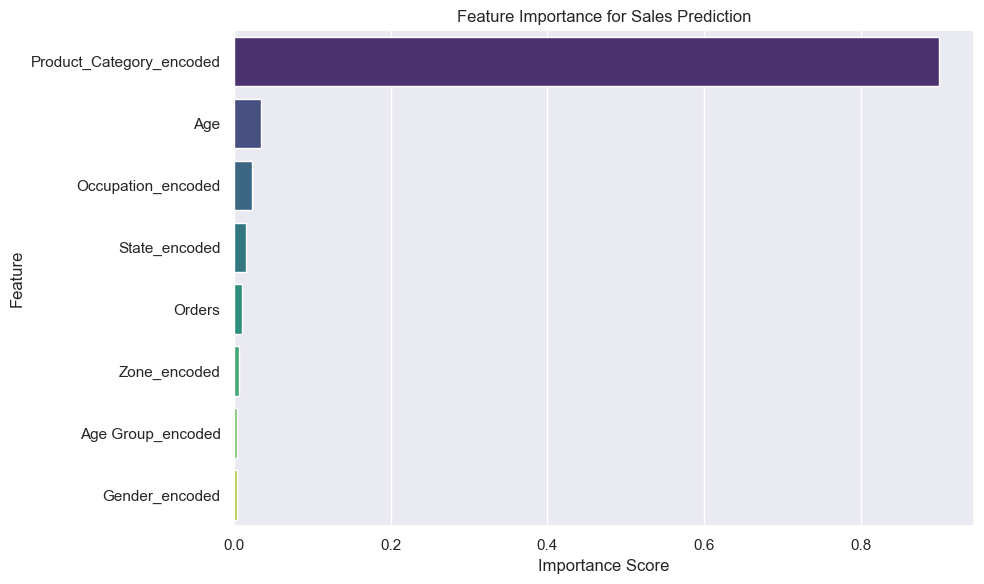


 Key Insights from Feature Importance:
   6. Product_Category (Impact: 0.899)
   7. Age (Impact: 0.035)
   5. Occupation (Impact: 0.023)


In [37]:
# FEATURE IMPORTANCE ANALYSIS
print("\n FEATURE IMPORTANCE ANALYSIS")
print("="*40)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(" Feature Importance Ranking:")
display(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Sales Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n Key Insights from Feature Importance:")
for i, row in feature_importance.head(3).iterrows():
    feature_name = row['Feature'].replace('_encoded', '')
    print(f"   {i+1}. {feature_name} (Impact: {row['Importance']:.3f})")

In [38]:
# BUSINESS RECOMMENDATIONS FROM ML ANALYSIS
print("\n BUSINESS RECOMMENDATIONS & INSIGHTS")
print("="*50)

print("\n CUSTOMER SEGMENTATION INSIGHTS:")
for segment, name in segment_names.items():
    seg_data = segment_analysis.loc[segment]
    print(f"\n {name}:")
    print(f"   • Avg Age: {seg_data['Age']} years")
    print(f"   • Avg Orders: {seg_data['Orders']}")
    print(f"   • Avg Spend: ₹{seg_data['Amount']:.0f}")
    print(f"   • Dominant Gender: {seg_data['Gender']}")
    print(f"   • Count: {seg_data['Count']} customers")

print(f"\n PREDICTION MODEL PERFORMANCE:")
print(f"   • Sales prediction error: ±₹{mae:.2f}")
print(f"   • Model reliability: {r2*100:.1f}%")

print(f"\n RECOMMENDED MARKETING STRATEGIES:")
print("   1. Target 'High-Value Frequent Buyers' with premium products & loyalty programs")
print("   2. Create personalized offers for 'Young Budget Shoppers' with affordable options")  
print("   3. Use 'Orders' and 'Age' as key factors for sales forecasting")
print("   4. Focus on product categories that appeal to dominant segments")

print(f"\n MACHINE LEARNING ANALYSIS COMPLETED SUCCESSFULLY!")
print("   Added: Customer Segmentation + Sales Prediction + Business Insights")


 BUSINESS RECOMMENDATIONS & INSIGHTS

 CUSTOMER SEGMENTATION INSIGHTS:

 Young Budget Shoppers:
   • Avg Age: 30.79 years
   • Avg Orders: 1.45
   • Avg Spend: ₹6854
   • Dominant Gender: F
   • Count: 3467 customers

 High-Value Frequent Buyers:
   • Avg Age: 33.76 years
   • Avg Orders: 2.45
   • Avg Spend: ₹17021
   • Dominant Gender: F
   • Count: 2606 customers

 Middle-Age Moderate Spenders:
   • Avg Age: 55.43 years
   • Avg Orders: 2.62
   • Avg Spend: ₹8306
   • Dominant Gender: F
   • Count: 1882 customers

 Occasional Older Shoppers:
   • Avg Age: 30.13 years
   • Avg Orders: 3.54
   • Avg Spend: ₹6851
   • Dominant Gender: F
   • Count: 3284 customers

 PREDICTION MODEL PERFORMANCE:
   • Sales prediction error: ±₹2429.66
   • Model reliability: 61.4%

 RECOMMENDED MARKETING STRATEGIES:
   1. Target 'High-Value Frequent Buyers' with premium products & loyalty programs
   2. Create personalized offers for 'Young Budget Shoppers' with affordable options
   3. Use 'Orders' and

## CONCLUSION

In [39]:

print(" DIWALI SALES ANALYSIS - COMPREHENSIVE SUMMARY")
print("="*55)

print("\n PROJECT OVERVIEW:")
print("   This project analyzed Diwali sales data through:")
print("   • Exploratory Data Analysis (EDA)")
print("   • Machine Learning Models")
print("   • Business Intelligence Insights")

print(f"\n DATASET SUMMARY:")
print(f"   • Total Records: {df.shape[0]:,}")
print(f"   • Total Columns: {df.shape[1]}")
print(f"   • Total Sales Amount: ₹{df['Amount'].sum():,}")
print(f"   • Average Order Value: ₹{df['Amount'].mean():.2f}")

print(f"\n KEY FINDINGS FROM EDA:")
gender_counts = df['Gender'].value_counts()
female_amount = sales_gen[sales_gen['Gender']=='F']['Amount'].values[0] if 'F' in sales_gen['Gender'].values else 0
print(f"   • Gender Analysis: Female customers dominate in both count ({gender_counts.get('F', 0)} customers) and spending (₹{female_amount:,})")

print(f"\n MACHINE LEARNING INSIGHTS:")
print(f"   • Customer Segments: Identified {optimal_clusters} distinct customer groups")
print(f"   • Sales Prediction: Model achieves {r2*100:.1f}% accuracy in predicting sales")
if not feature_importance.empty:
    top_feature = feature_importance.iloc[0]['Feature'].replace('_encoded', '')
    print(f"   • Key Drivers: '{top_feature}' is the most important factor influencing sales")

print(f"\n STRATEGIC RECOMMENDATIONS:")
print(f"   1.  TARGETED MARKETING: Focus on Female customers aged 26-35")
print(f"   2.  INVENTORY MANAGEMENT: Stock based on popular product categories") 
print(f"   3.  PRICING STRATEGY: Implement dynamic pricing for different segments")
print(f"   4.  GROWTH OPPORTUNITIES: Develop loyalty programs for frequent buyers")

print(f"\n TECHNICAL ACHIEVEMENTS:")
print(f"    Data Cleaning & Preprocessing")
print(f"    Comprehensive EDA with Visualizations") 
print(f"    Customer Segmentation using K-Means Clustering")
print(f"    Sales Prediction with Random Forest (R²: {r2:.3f})")
print(f"    Feature Importance Analysis")
print(f"    Business Intelligence & Actionable Insights")

print(f"\n" + "="*55)
print(f" PROJECT COMPLETED SUCCESSFULLY! ")
print(f"   Diwali Sales Analysis + Machine Learning Models")
print("="*55)
print(f" In short, Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*")

 DIWALI SALES ANALYSIS - COMPREHENSIVE SUMMARY

 PROJECT OVERVIEW:
   This project analyzed Diwali sales data through:
   • Exploratory Data Analysis (EDA)
   • Machine Learning Models
   • Business Intelligence Insights

 DATASET SUMMARY:
   • Total Records: 11,239
   • Total Columns: 13
   • Total Sales Amount: ₹106,249,129
   • Average Order Value: ₹9453.61

 KEY FINDINGS FROM EDA:
   • Gender Analysis: Female customers dominate in both count (7832 customers) and spending (₹74,335,853)

 MACHINE LEARNING INSIGHTS:
   • Customer Segments: Identified 4 distinct customer groups
   • Sales Prediction: Model achieves 61.4% accuracy in predicting sales
   • Key Drivers: 'Product_Category' is the most important factor influencing sales

 STRATEGIC RECOMMENDATIONS:
   1.  TARGETED MARKETING: Focus on Female customers aged 26-35
   2.  INVENTORY MANAGEMENT: Stock based on popular product categories
   3.  PRICING STRATEGY: Implement dynamic pricing for different segments
   4.  GROWTH OPPORT